In [1]:
import torch
import torch.nn.functional as F
import torchvision
from torchvision import transforms as T
from utils import data, evaluate, models, train, plot
from torchsummary import summary
from torchvision.models import densenet169, DenseNet169_Weights
import torch.nn as nn

# Parameter Initialization

In [2]:
data_path = 'data/asl_alphabet_train'
samples = 12000
split_factor = [0.7, 0.15, 0.15]
batch_size = 128
lr = 5e-4
epochs = 5
image_size = (100, 100)
l2_reg = 2e-3

# Get Train, Val and Test Split

In [3]:
torch.manual_seed(0)
trans = T.Compose([T.ToTensor(), T.Resize(image_size), T.Normalize((0.5190, 0.4992, 0.5140), (0.2244, 0.2523, 0.2616))])
dataset = torchvision.datasets.ImageFolder(root=data_path, transform=trans)
train_loader, valid_loader, test_loader = data.split_dataset(dataset, samples, split_factor, batch_size)

# Model

In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using {device} device')

model = torchvision.models.densenet169(weights=DenseNet169_Weights.IMAGENET1K_V1)
model = model.to(device)
summary = nn.Sequential(model, nn.Softmax(dim=1))
print(summary)

Using cuda device
Sequential(
  (0): DenseNet(
    (features): Sequential(
      (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu0): ReLU(inplace=True)
      (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (denseblock1): _DenseBlock(
        (denselayer1): _DenseLayer(
          (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu1): ReLU(inplace=True)
          (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu2): ReLU(inplace=True)
          (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        )
        (denselayer2): _DenseLayer(
          (norm1): BatchNorm2d(96, eps=1e-0

## 1) Training Phase

In [5]:
train_loss_list, train_accuracy_list, val_loss_list, val_accuracy_list = train.train_model(model, train_loader, valid_loader, 
                                                                                           lr, epochs, device, l2_reg)

Epoch 1 -> Loss = 0.0952 | Train Accuracy = 97.93% | valation Accuracy = 96.61%
Epoch 2 -> Loss = 0.0303 | Train Accuracy = 99.25% | valation Accuracy = 98.78%
Epoch 3 -> Loss = 0.0180 | Train Accuracy = 99.52% | valation Accuracy = 99.00%
Epoch 4 -> Loss = 0.0121 | Train Accuracy = 99.75% | valation Accuracy = 99.28%
Epoch 5 -> Loss = 0.0280 | Train Accuracy = 99.37% | valation Accuracy = 99.39%
----------------------------------------------------------------------------------------------------
Time taken to train: 296.50s
Average time of each epoch: 59.30s


### Plots

Final Train Accuracy = 99.37%
Final Validation Accuracy  = 99.39%


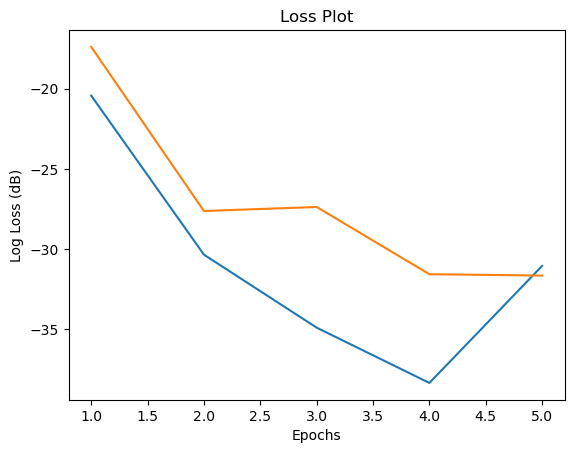

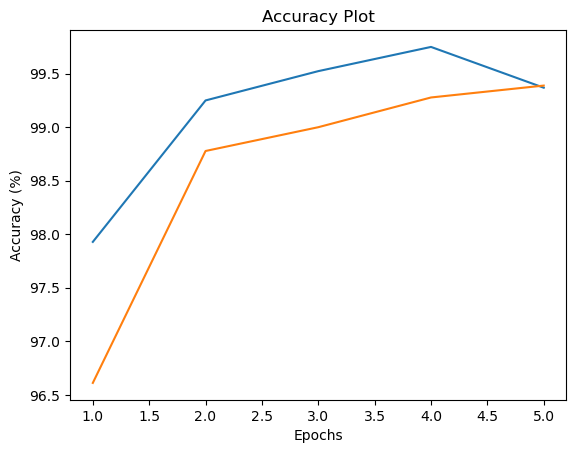

In [6]:
plot.plot_metrics(train_loss_list, train_accuracy_list, val_loss_list, val_accuracy_list)

## 2) Testing Phase

### i) Test Accuracy

In [7]:
test_accuracy, y_true, y_pred = evaluate.evaluate_model(model, test_loader, device)

Test Accuracy = 98.5556%
F1 Score = 0.9856
Recall = 0.9856
Precision = 0.9861


### ii) Confusion Matrix

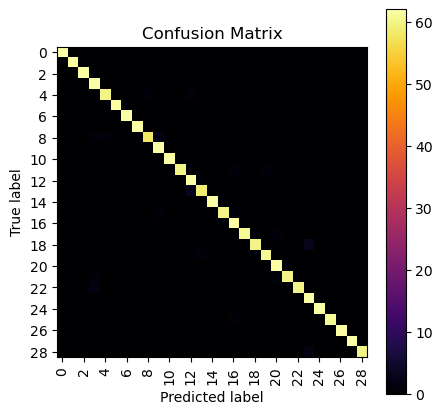

In [8]:
evaluate.conf_matrix(dataset, y_true, y_pred)